## *Project Name - CAR RESALE VALUE PREDICTION*

## *Team ID - PNT2022TMID32311*

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

## Read the Dataset

In [2]:
df=pd.read_csv('autos.csv')

## Data Preprocessing

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 0:00:00,0,70435,2016-04-07 3:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 0:00:00,0,66954,2016-04-07 1:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 0:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 0:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 0:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 0:00:00,0,39576,2016-04-06 0:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 0:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 0:00:00,0,87439,2016-04-07 7:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 0:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 0:00:00,0,73326,2016-03-22 3:17:10


In [5]:
df.shape

(371528, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
#Drop the irrelevant columns

df=df.drop(columns=['dateCrawled','dateCreated','lastSeen','name','abtest','nrOfPictures','postalCode'],axis=1)

In [9]:
df.head()

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,privat,Angebot,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,privat,Angebot,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,privat,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,privat,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [10]:
df.seller.unique() 

array(['privat', 'gewerblich'], dtype=object)

In [11]:
df.seller.value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [12]:
# Since gewerblich has only 3, so drop it

df=df.drop(columns=['seller'],axis=1)

In [13]:
df.offerType.unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [14]:
df.offerType.value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [15]:
# OfferType has only 12 Gesuch values, so drop it

df=df.drop(columns=['offerType'],axis=1)

In [16]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [17]:
#Cars having power less than 50ps and greater than 900ps seems a little suspicious

df=df[(df.powerPS>50) & (df.powerPS<900)]

In [18]:
df.shape #around 50000 data are removed

(319709, 11)

In [19]:
df.yearOfRegistration.unique()

array([2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2016, 2007, 2009,
       2002, 2018, 1990, 2017, 2003, 1991, 1984, 2006, 1999, 2012, 1994,
       2010, 2000, 1992, 1997, 2013, 1996, 1989, 2015, 1968, 1993, 1985,
       1983, 1959, 1981, 1969, 1971, 1987, 1973, 1988, 1967, 1980, 1986,
       1965, 1974, 1979, 1982, 1978, 1976, 1972, 1977, 1961, 1964, 1975,
       1966, 1970, 1937, 1963, 1954, 1955, 1941, 1962, 1500, 1960, 1951,
       1910, 1949, 1953, 2019, 1957, 1958, 2900, 6000, 1956, 1933, 5911,
       4000, 1950, 1948, 8000, 1931, 5000, 1000, 1942, 1936, 1935, 3000,
       6500, 9000, 9999, 1952, 1930, 1943, 1945, 1800, 1947, 1939, 2800,
       1934, 4500, 8200, 3500], dtype=int64)

In [20]:
#Let's filter yearOfRegistration range between 1950 and 2017

df=df[(df.yearOfRegistration >=1950) & (df.yearOfRegistration <2017)]

In [21]:
df.shape #around 50000 records were removed

(309171, 11)

In [22]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja


In [23]:
df.gearbox.unique()

array(['manuell', 'automatik', nan], dtype=object)

In [24]:
df.fuelType.unique()

array(['diesel', 'benzin', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [25]:
df.brand.unique()

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'honda', 'fiat',
       'opel', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo',
       'subaru', 'volvo', 'mitsubishi', 'kia', 'seat', 'lancia',
       'porsche', 'citroen', 'toyota', 'chevrolet', 'dacia', 'suzuki',
       'daihatsu', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'land_rover', 'lada', 'trabant'], dtype=object)

In [26]:
df.vehicleType.unique()

array(['coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', nan, 'andere'], dtype=object)

In [27]:
df.notRepairedDamage.unique()

array(['ja', nan, 'nein'], dtype=object)

In [28]:
#make a copy of dataset

new_df=df.copy()

In [29]:
# The dataset contains many german words. 
# So, replace it with english words

df.gearbox.replace(('manuell','automatik'),('manual','automatic'),inplace=True)
df.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)
df.vehicleType.replace(('kleinwagen','cabrio','kombi','andere'),('small car','convertible','combination','others'),inplace=True)
df.notRepairedDamage.replace(('ja','nein'),('yes','no'),inplace=True)

In [30]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes
2,9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN
3,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no
5,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes


In [31]:
# Checking for Missing Values

df.isnull().any()

price                  False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dtype: bool

In [32]:
df.isnull().sum()

price                      0
vehicleType            11422
yearOfRegistration         0
gearbox                 5298
powerPS                    0
model                  11799
kilometer                  0
monthOfRegistration        0
fuelType               15887
brand                      0
notRepairedDamage      43481
dtype: int64

In [33]:
df.mode()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,0,limousine,2005,manual,75,golf,150000,3,petrol,volkswagen,no


In [34]:
# Handling Missing values

df.vehicleType.fillna(value='not-declared',inplace=True)
df.gearbox.fillna(value='not-declared',inplace=True)
df.model.fillna(value='not-declared',inplace=True)
df.fuelType.fillna(value='not-declared',inplace=True)
df.notRepairedDamage.fillna(value='not-declared',inplace=True)

In [35]:
df.isnull().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [36]:
df.gearbox.unique()

array(['manual', 'automatic', 'not-declared'], dtype=object)

In [37]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manual,190,not-declared,125000,5,diesel,audi,yes
2,9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,not-declared
3,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no
5,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes


C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

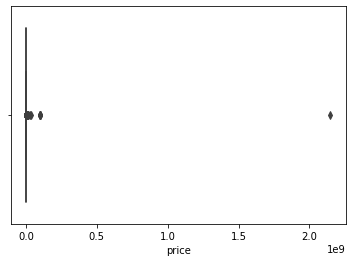

In [38]:
#checking outliers

sns.boxplot(df.price)

In [39]:
df.price.median()

3500.0

In [40]:
df.price.max()

2147483647

In [41]:
df.price.min()

0

In [42]:
#removing outliers

df=df[(df.price >=100) & (df.price <= 150000)]

In [43]:
#Save the dataframe for future purpose

df.to_csv('autos_preprocessed.csv')

## Data Visualization

## Uni-variate Analysis

<AxesSubplot:>

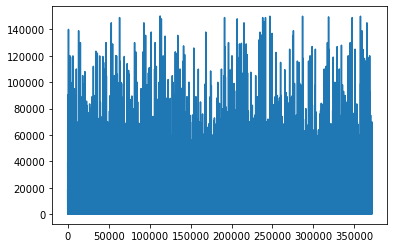

In [44]:
df.price.plot()

C:\Users\God\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearOfRegistration', ylabel='Density'>

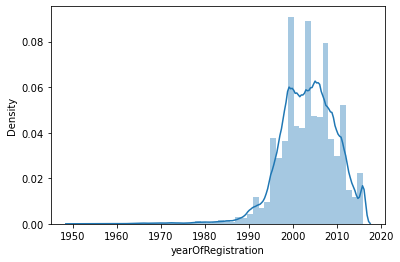

In [45]:
sns.distplot(df.yearOfRegistration)

### Bi-variate Analysis

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthOfRegistration', ylabel='price'>

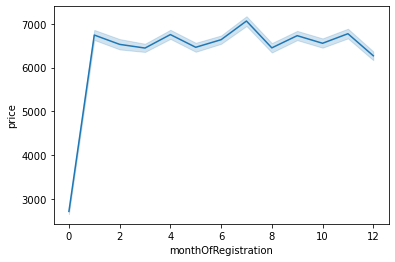

In [46]:
sns.lineplot(df.monthOfRegistration,df.price)

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='vehicleType'>

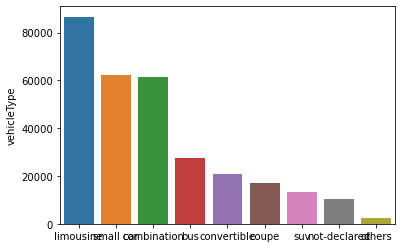

In [47]:
sns.barplot(df.vehicleType.value_counts().index,df.vehicleType.value_counts())

## Multi-variate Analysis

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearOfRegistration'}>],
       [<AxesSubplot:title={'center':'powerPS'}>,
        <AxesSubplot:title={'center':'kilometer'}>],
       [<AxesSubplot:title={'center':'monthOfRegistration'}>,
        <AxesSubplot:>]], dtype=object)

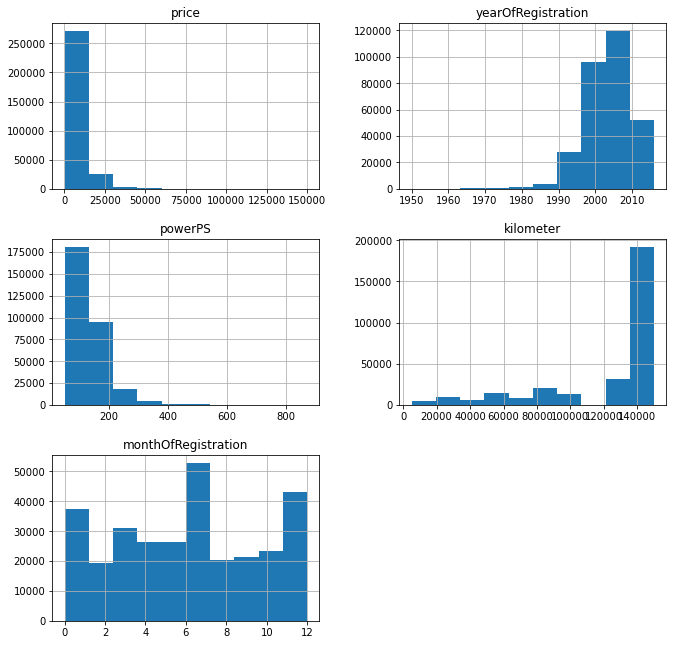

In [48]:
df.hist(figsize=(11,11))

## Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df.vehicleType=le.fit_transform(df.vehicleType)
df.gearbox=le.fit_transform(df.gearbox)
df.model=le.fit_transform(df.model)
df.fuelType=le.fit_transform(df.fuelType)
df.brand=le.fit_transform(df.brand)
df.notRepairedDamage=le.fit_transform(df.notRepairedDamage)

In [51]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,3,2011,1,190,162,125000,5,1,1,2
2,9800,8,2004,0,163,118,125000,8,1,14,1
3,1500,7,2001,1,75,117,150000,6,7,38,0
4,3600,7,2008,1,69,102,90000,7,1,31,0
5,650,4,1995,1,102,11,150000,10,7,2,2


## Descriptive statistics

In [52]:
df.describe() 

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
count,301921.000000,301921.000000,301921.000000,301921.000000,301921.000000,301921.000000,301921.000000,301921.000000,301921.000000,301921.000000,301921.000000
mean,6404.111566,3.682702,2003.398200,0.789717,129.216242,101.197519,125405.503426,6.025735,4.938928,20.182452,0.317378
std,8256.669122,2.481021,6.555808,0.445225,61.466518,71.911033,39265.303480,3.562360,2.755863,13.440191,0.631399
min,100.000000,0.000000,1950.000000,0.000000,51.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.000000,1.000000,1999.000000,1.000000,86.000000,39.000000,100000.000000,3.000000,1.000000,9.000000,0.000000
50%,3600.000000,4.000000,2004.000000,1.000000,116.000000,98.000000,150000.000000,6.000000,7.000000,22.000000,0.000000
75%,8200.000000,7.000000,2008.000000,1.000000,150.000000,162.000000,150000.000000,9.000000,7.000000,32.000000,0.000000
max,150000.000000,8.000000,2016.000000,2.000000,871.000000,249.000000,150000.000000,12.000000,7.000000,39.000000,2.000000


## Correlation Analysis

In [53]:
df.corr()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
price,1.000000,-0.083037,0.395732,-0.297933,0.580949,-0.007600,-0.448329,0.042487,-0.203126,-0.095995,-0.209156
vehicleType,-0.083037,1.000000,0.006506,0.067429,-0.237909,0.038702,-0.133673,-0.017606,0.254723,0.061106,0.025272
yearOfRegistration,0.395732,0.006506,1.000000,-0.086495,0.156076,0.048300,-0.378310,0.041758,-0.278532,-0.025976,-0.147340
gearbox,-0.297933,0.067429,-0.086495,1.000000,-0.444687,0.042737,0.042877,-0.048530,0.152581,0.121519,0.069467
powerPS,0.580949,-0.237909,0.156076,-0.444687,1.000000,-0.121767,-0.029025,0.035221,-0.155442,-0.287794,-0.093364
model,-0.007600,0.038702,0.048300,0.042737,-0.121767,1.000000,-0.030094,-0.007534,-0.049041,0.472016,0.014922
kilometer,-0.448329,-0.133673,-0.378310,0.042877,-0.029025,-0.030094,1.000000,-0.018523,-0.110593,-0.029569,0.131660
monthOfRegistration,0.042487,-0.017606,0.041758,-0.048530,0.035221,-0.007534,-0.018523,1.000000,-0.053818,-0.011039,-0.082565
fuelType,-0.203126,0.254723,-0.278532,0.152581,-0.155442,-0.049041,-0.110593,-0.053818,1.000000,0.035144,0.048369
brand,-0.095995,0.061106,-0.025976,0.121519,-0.287794,0.472016,-0.029569,-0.011039,0.035144,1.000000,0.006316


<AxesSubplot:>

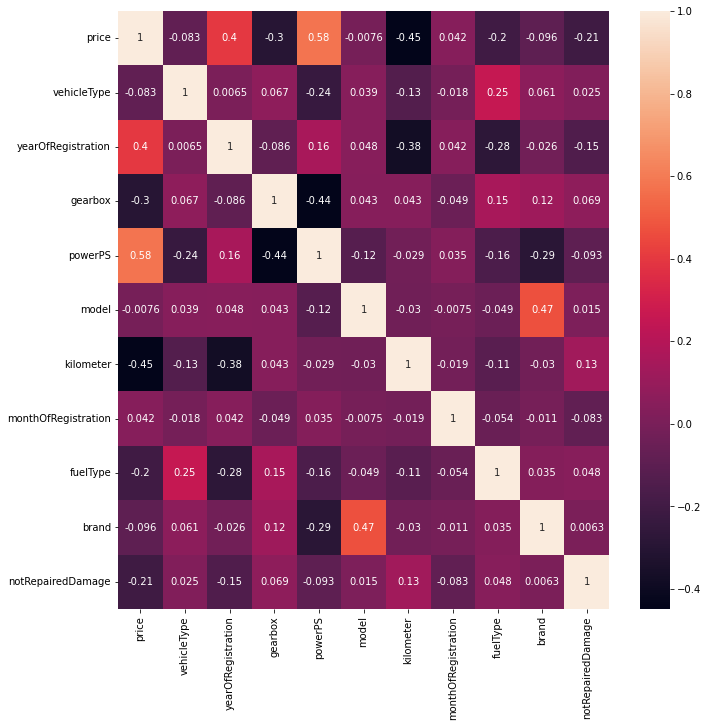

In [54]:
#To visualize correlation

plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True)

## Split the data into Independent and Dependent Variables

In [55]:
X=df.drop(columns=['price'])
X.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,3,2011,1,190,162,125000,5,1,1,2
2,8,2004,0,163,118,125000,8,1,14,1
3,7,2001,1,75,117,150000,6,7,38,0
4,7,2008,1,69,102,90000,7,1,31,0
5,4,1995,1,102,11,150000,10,7,2,2


In [56]:
y=df.price
y.head()

1    18300
2     9800
3     1500
4     3600
5      650
Name: price, dtype: int64

## Scaling the Independent Variable

In [57]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [58]:
X_scaled=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)
X_scaled.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,0.375,0.924242,0.5,0.169512,0.650602,0.827586,0.416667,0.142857,0.025641,1.0
1,1.000,0.818182,0.0,0.136585,0.473896,0.827586,0.666667,0.142857,0.358974,0.5
2,0.875,0.772727,0.5,0.029268,0.469880,1.000000,0.500000,1.000000,0.974359,0.0
3,0.875,0.878788,0.5,0.021951,0.409639,0.586207,0.583333,0.142857,0.794872,0.0
4,0.500,0.681818,0.5,0.062195,0.044177,1.000000,0.833333,1.000000,0.051282,1.0


## Split the train data and test data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [61]:
x_train.shape

(211344, 10)

In [62]:
x_test.shape

(90577, 10)